[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dbwilburn/CCIC_MSP2024/blob/main/MS_Data_Visualization_Demo_July2024.ipynb)

## Introduction to Data Analysis in Mass Spectrometry-based Proteomics
### Damien Beau Wilburn -  July 2024

This notebook is intended as a brief introduction to loading and visualizing mass spectrometry data in Python.

### Install and load relevant libraries



In [ ]:
!pip install --upgrade numpy pandas matplotlib pyteomics

In [35]:
## Import libraries
import numpy as np # For numerical operations
import pandas as pd # For loading the table
import matplotlib.pyplot as plt # For data visualization

from pyteomics import mzml # For loading raw data


Load the sample data

In [83]:
mzml_file = 'https://raw.githubusercontent.com/dbwilburn/CCIC_MSP2024/main/sample_data.mzML'

stream = mzml.read(mzml_file) # Opened connection to sample_data.mzML to begin reading
spectra = list(stream) # Load the entire stream into memory as a list of spectra

In [84]:
## View the first spectrum as a dictionary

spectra[0]

{'index': 0,
 'id': 'controllerType=0 controllerNumber=1 scan=2001',
 'defaultArrayLength': 39,
 'scanList': {'count': 1,
  'scan': [{'scanWindowList': {'count': 1,
     'scanWindow': [{'scan window lower limit': 100.0 m/z,
       'scan window upper limit': 1136.0 m/z}]},
    'scan start time': 12.3212628605333 minute,
    'filter string': 'FTMS + c NSI d Full ms2 562.7644@hcd30.00 [100.0000-1136.0000]',
    'ion injection time': 20.0 millisecond,
    '[Thermo Trailer Extra]Monoisotopic M/Z:': 562.7644}],
  'no combination': ''},
 'precursorList': {'count': 1,
  'precursor': [{'spectrumRef': 'controllerType=0 controllerNumber=1 scan=1980',
    'isolationWindow': {'isolation window target m/z': 562.764404296875 m/z,
     'isolation window lower offset': 0.65 m/z,
     'isolation window upper offset': 0.65 m/z},
    'selectedIonList': {'count': 1,
     'selectedIon': [{'selected ion m/z': 562.764404296875 m/z,
       'charge state': 2,
       'peak intensity': 211994.773925781 number of 

### Let's visualize this spectrum as a two part plot: a "typical" representation as a mass spectrum, and the scatter plot version

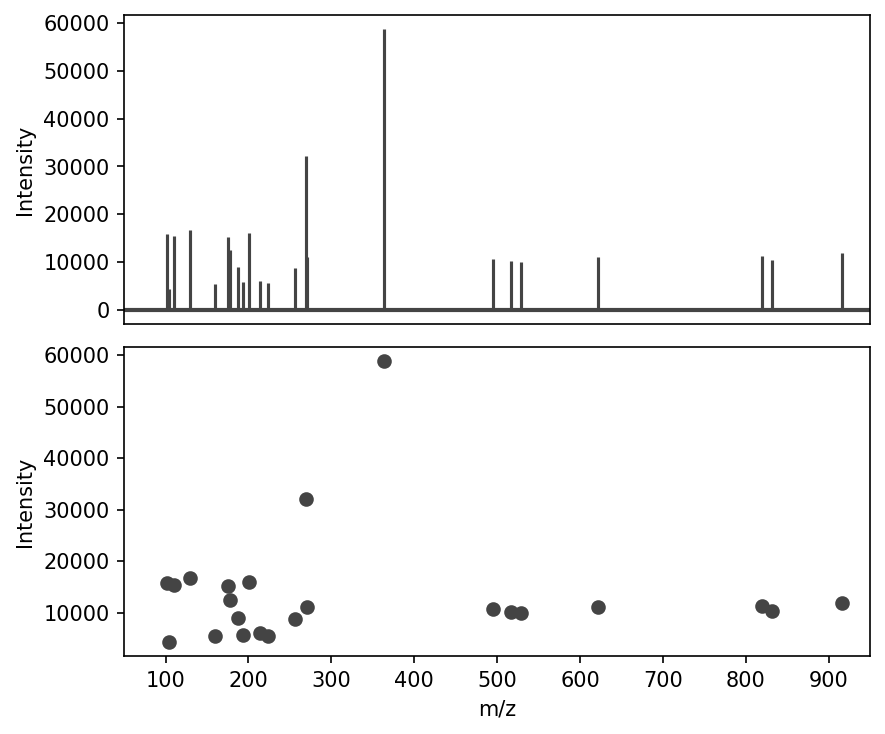

In [23]:

fig, ax = plt.subplots(figsize=(6,5), dpi=150, nrows=2) # Configure the figure
lcolor = '#444444'
xlim = (50,950)

# Store data in temporary arrays
mz_array = spectra[0]['m/z array'] 
int_array = spectra[0]['intensity array'] 

# Generate vline plot and scatter plot
ax[0].plot([0,950], [0]*2, linewidth=2, color=lcolor) # Add x-axis
ax[0].vlines(mz_array, 0, int_array, color=lcolor)
ax[1].scatter(mz_array, int_array, color=lcolor)


# Set plot specific labels
ax[0].set_xticks([])
ax[1].set_xlabel('m/z')

# Set global labels
for i in range(2):
    ax[i].set_ylabel('Intensity')
    ax[i].set(xlim=xlim)
    
fig.tight_layout()


### Import the test search results as a `pandas DataFrame`

In [85]:
results_file = 'https://raw.githubusercontent.com/dbwilburn/CCIC_MSP2024/main/sample_search.tsv'

search_results = pd.read_csv(results_file, delimiter='\t')

In [86]:
search_results.head(10)

,scannum,precursor_neutral_mass,retention_time,charge,ion_mobility,compensation_voltage,hit_rank,peptide,peptide_prev_aa,peptide_next_aa,...,modification_info,hyperscore,nextscore,expectscore,best_locs,score_without_delta_mass,best_score_with_delta_mass,second_best_score_with_delta_mass,delta_score,alternative_proteins
0,2008,879.503906,12.332623,2,-1.0,0,1,RIPQNPR,-,-,...,NaN,17.219000,14.013,0.066768,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,1144.526245,12.335050,3,-1.0,0,1,VHNQEEYAR,-,-,...,NaN,16.070999,11.571,0.128012,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1087.565430,12.341781,3,-1.0,0,1,RLEEEEKR,-,-,...,NaN,14.454000,11.698,0.637594,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,1144.526123,12.344025,2,-1.0,0,1,VHNQEEYAR,-,-,...,NaN,11.498000,0.000,0.003166,NaN,NaN,NaN,NaN,NaN,NaN
4,2027,879.503906,12.353533,2,-1.0,0,1,RIPQNPR,-,-,...,NaN,17.052999,13.845,0.036054,NaN,NaN,NaN,NaN,NaN,NaN
5,2030,1144.526123,12.356586,3,-1.0,0,1,VHNQEEYAR,-,-,...,NaN,17.577999,11.678,0.001051,NaN,NaN,NaN,NaN,NaN,NaN
6,2033,1087.565308,12.358829,3,-1.0,0,1,RLEEEEKR,-,-,...,NaN,12.847000,0.000,0.460521,NaN,NaN,NaN,NaN,NaN,NaN
7,2043,879.503845,12.372705,2,-1.0,0,1,RIPQNPR,-,-,...,NaN,17.297001,12.540,0.036566,NaN,NaN,NaN,NaN,NaN,NaN
8,2046,1144.526123,12.378386,3,-1.0,0,1,VHNQEEYAR,-,-,...,NaN,17.547001,11.617,0.001238,NaN,NaN,NaN,NaN,NaN,NaN
9,2049,1087.564941,12.380630,3,-1.0,0,1,RLEEEEKR,-,-,...,NaN,16.121000,8.916,0.069944,NaN,NaN,NaN,NaN,NaN,NaN


### The current search results are organized by scannum, and in the mzML records, each scannum is contained as a substring in the value associated with the key "id"
### Let's transform the spectral dictionaries into a dict of dicts where each key is the scannum and the value is the full record dict. Add the peptide ID from the results table

In [87]:
scannum_to_peptide = dict(zip(search_results.scannum, search_results.peptide))
scannum_to_expect = dict(zip(search_results.scannum, search_results.expectscore))

spectrum_by_scannum = dict()
for s in spectra:
    scannum = int(s['id'].split('scan=')[1])
    spectrum_by_scannum[scannum] = s
    spectrum_by_scannum[scannum]['peptide'] = scannum_to_peptide.get(scannum, None)
    spectrum_by_scannum[scannum]['expect'] = scannum_to_expect.get(scannum, None)
    spectrum_by_scannum[scannum]['RT'] = s['scanList']['scan'][0]['scan start time']
    


Let's find all of the scan numbers that correspond to the peptide <b>IGYDHGHIEHK</b>

In [63]:
s['scanList']['scan'][0]['scan start time']

13.2553455976 minute

In [34]:
for scannum in spectrum_by_scannum:
    if spectrum_by_scannum[scannum]['peptide'] == 'IGYDHGHIEHK':
        print(scannum, scannum_to_expect[scannum])

2497 0.8612055
2501 0.02820007
2505 4.16523e-08
2509 9.173129e-07
2516 1.666938e-05
2519 0.001458814
2523 5.290908e-06
2526 0.01804055
2536 9.023855e-07
2539 1.645189e-12
2549 1.563023e-08
2552 3.936396e-10
2571 2.926094e-08
2574 1.032383e-14
2584 4.097153e-08
2587 4.221629e-09
2603 8.464237e-08
2609 8.07553e-09
2622 3.925909e-07
2628 1.517581e-09
2641 1.964197e-08
2647 7.318796e-12
2663 7.175897e-09
2672 2.957611e-12
2688 1.597249e-06
2694 2.116532e-07


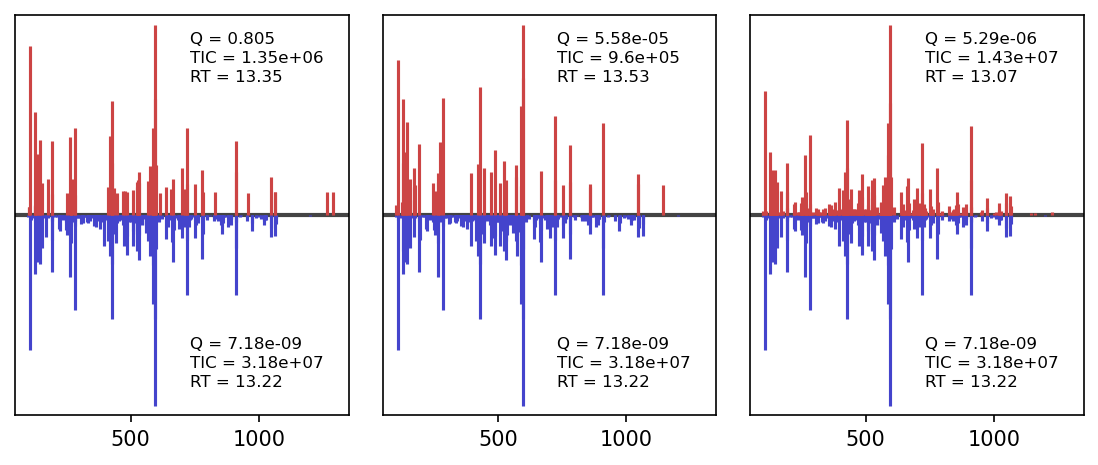

In [106]:
## Let's pick three spectra to compare

reference = 2663
focal_spectra = [2784, 2951, 2523]

ref_color = '#4444cc'
comp_color = '#cc4444'
xlim = (50,1350)
ylim = (-1.05, 1.05)

text_x = 730


n_cols = len(focal_spectra)
fig, ax = plt.subplots(figsize=(7.5,3.2), dpi=150, ncols=n_cols)


ref_mz = spectrum_by_scannum[reference]['m/z array']
ref_int = spectrum_by_scannum[reference]['intensity array']
ref_int_norm = ref_int / np.max(ref_int) # Normalize to most intense ion
ref_q = scannum_to_expect[reference]
ref_rt = spectrum_by_scannum[reference]['RT']

for i in range(n_cols):
    ax[i].plot([-50,2000], [0]*2, linewidth=2, color=lcolor) # Zero line
    ax[i].vlines(ref_mz, 0, -ref_int_norm, color=ref_color)
    ax[i].text(text_x, -0.7, f"Q = {ref_q:.3}", fontsize=8)
    ax[i].text(text_x, -0.8, f"TIC = {np.sum(ref_int):.3}", fontsize=8)
    ax[i].text(text_x, -0.9, f"RT = {np.sum(ref_rt):.4}", fontsize=8)
    
    comp_scannum = focal_spectra[i]
    comp_mz = spectrum_by_scannum[comp_scannum]['m/z array']
    comp_int = spectrum_by_scannum[comp_scannum]['intensity array']
    comp_int_norm = comp_int / np.max(comp_int) # Normalize to most intense ion
    comp_q = scannum_to_expect[comp_scannum]
    comp_rt = spectrum_by_scannum[comp_scannum]['RT']
    
    ax[i].vlines(comp_mz, 0, comp_int_norm, color=comp_color)
    ax[i].text(text_x, 0.9, f"Q = {comp_q:.3}", fontsize=8)
    ax[i].text(text_x, 0.8, f"TIC = {np.sum(comp_int):.3}", fontsize=8)
    ax[i].text(text_x, 0.7, f"RT = {np.sum(comp_rt):.4}", fontsize=8)
    
    ax[i].set_yticks([])
    
    ax[i].set(xlim=xlim, ylim=ylim)
    
fig.tight_layout()
    





In [90]:
search_results[(search_results.peptide == 'IGYDHGHIEHK') & (search_results.charge == 3)].sort_values('retention_time')

,scannum,precursor_neutral_mass,retention_time,charge,ion_mobility,compensation_voltage,hit_rank,peptide,peptide_prev_aa,peptide_next_aa,...,modification_info,hyperscore,nextscore,expectscore,best_locs,score_without_delta_mass,best_score_with_delta_mass,second_best_score_with_delta_mass,delta_score,alternative_proteins
60,2497,1304.625244,13.013140,3,-1.0,0,1,IGYDHGHIEHK,-,-,...,NaN,14.692000,0.000,8.612055e-01,NaN,NaN,NaN,NaN,NaN,NaN
61,2501,1304.625244,13.022833,3,-1.0,0,1,IGYDHGHIEHK,-,-,...,NaN,17.698999,0.000,2.820007e-02,NaN,NaN,NaN,NaN,NaN,NaN
62,2505,1304.625244,13.032329,3,-1.0,0,1,IGYDHGHIEHK,-,-,...,NaN,26.674000,12.121,4.165230e-08,NaN,NaN,NaN,NaN,NaN,NaN
63,2509,1304.625244,13.042181,3,-1.0,0,1,IGYDHGHIEHK,-,-,...,NaN,26.737000,12.263,9.173129e-07,NaN,NaN,NaN,NaN,NaN,NaN
64,2516,1304.625244,13.057520,3,-1.0,0,1,IGYDHGHIEHK,-,-,...,NaN,25.466999,16.264,1.666938e-05,NaN,NaN,NaN,NaN,NaN,NaN
66,2523,1304.625244,13.069111,3,-1.0,0,1,IGYDHGHIEHK,-,-,...,NaN,24.664000,13.192,5.290908e-06,NaN,NaN,NaN,NaN,NaN,NaN
68,2536,1304.625244,13.084727,3,-1.0,0,1,IGYDHGHIEHK,-,-,...,NaN,26.388000,13.647,9.023855e-07,NaN,NaN,NaN,NaN,NaN,NaN
70,2549,1304.625244,13.100014,3,-1.0,0,1,IGYDHGHIEHK,-,-,...,NaN,32.587002,14.769,1.563023e-08,NaN,NaN,NaN,NaN,NaN,NaN
74,2571,1304.625244,13.122281,3,-1.0,0,1,IGYDHGHIEHK,-,-,...,NaN,32.533001,14.748,2.926094e-08,NaN,NaN,NaN,NaN,NaN,NaN
77,2584,1304.625244,13.137354,3,-1.0,0,1,IGYDHGHIEHK,-,-,...,NaN,30.986000,13.226,4.097153e-08,NaN,NaN,NaN,NaN,NaN,NaN
